## Unequal Narratives? Investigating Media Bias in the Israel-Palestine Conflict

Subtopics:
1. Sentiment Analysis and Keyword Frequency of Headlines
2. Event Salience: Coverage vs. Casualties
3. Comparative Outlet Ideology

### Installation of requirements. 

The following cell contains all the necessary dependencies needed for this project.

Here we can add every dependency needed and describe it:
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`scikit-learn`](https://scikit-learn.org/stable/) is a Python package with different machinelearning algorithms. [Here](https://scikit-learn.org/stable/modules/classes.html) is the documentation of `sklearn`.
* [`seaborn`](https://seaborn.pydata.org/) is a Python package based on matplotlib that simplifies data visualization and works well with pandas DataFrames.
* [`nltk`](https://www.nltk.org/) is a Python package for working with natural language processing tasks. It includes tools for tokenization, stemming, and other NLP techniques.
* [`vaderSentiment`](https://pypi.org/project/vaderSentiment/) vaderSentiment: A Python library for sentiment analysis. It is particularly good for short texts like social media posts or headlines.
* [`transformers`](https://pypi.org/project/transformers/) is a Python library by Hugging Face for using pre-trained transformer models (like BERT, GPT, etc.) for various NLP tasks. 
* [`torch`](https://pytorch.org/) is aPython package for deep learning and machine learning. It's used as a backend for models like BERT and other neural network models.

In [15]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install seaborn
! pip install nltk vaderSentiment transformers
! pip install torch transformers

### Import requirements
The cell below imports all necessary dependancies.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import numpy as np
from sklearn.linear_model import LinearRegression

## Data Preparation and Preprocessing

### Data cleaning from the file from Media Cloud (https://search.mediacloud.org/). 

Details about the date enter here.


In [45]:
file_path = '../data/data.csv'
data = pd.read_csv(file_path)
data

,id,indexed_date,language,media_name,media_url,publish_date,title,url
0,609b49fdea2e02b3da9be8594a1e71daf839cc31cf184d...,2025-01-06 18:18:20.886953,en,nytimes.com,nytimes.com,2024-10-07,"Campuses Are Calmer, but They Are Not Normal, ...",https://www.nytimes.com/2024/10/07/us/campus-c...
1,e88291a5c2b82ede03a526071c1d1b8fa77e23fcec1edd...,2024-10-07 18:24:01.615866,en,nypost.com,nypost.com,2024-10-07,"Trump hints that he’s open to Richard Grenell,...",https://nypost.com/2024/10/07/us-news/donald-t...
2,f810fcfd715f8c7412f8da51c992b140f6db253abac936...,2024-10-07 13:28:40.202129,en,foxnews.com,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...,https://www.foxnews.com/world/hezbollah-rocket...
3,a360fa0abf34985b9a1db2e169dd9349f8e4e60d559e9f...,2024-10-07 23:23:57.316841,en,nypost.com,nypost.com,2024-10-07,"Kamala Harris, Emhoff plant tree for Oct. 7 vi...",https://nypost.com/2024/10/07/us-news/kamala-h...
4,1a06b76f8c6516a469b4a32a2f898b595487018e380483...,2024-10-08 06:33:09.401765,en,cnn.com,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...,https://www.cnn.com/2024/10/07/world/video/the...
...,...,...,...,...,...,...,...,...
25261,fb62dcff0bed5b4e07b6f3b453d399033142b144178a46...,2024-02-19 16:45:53.602867,en,washingtonpost.com,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...,https://www.washingtonpost.com/opinions/2023/1...
25262,b68f94c49afee4ad2427bc4a5a0a0a15d9ce67bf45b4fe...,2024-02-19 16:10:13.944341,en,nytimes.com,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...,https://www.nytimes.com/2023/10/07/world/middl...
25263,435cd12f57471cb4753902a4a4ea17cbaec8754465f728...,2024-02-19 17:45:25.642968,en,nytimes.com,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade,https://www.nytimes.com/2023/10/07/world/middl...
25264,682b2869c252ea3d5e134e14452bac72cf50db359fd156...,2024-02-19 17:15:09.644319,en,washingtontimes.com,washingtontimes.com,2023-10-07,Biden ready to offer ‘all means of appropriate...,https://www.washingtontimes.com/news/2023/oct/...


Filtering by keywords: We check if the title column contains any of the needed words, ignoring case sensitivity and handling missing values.

In [46]:
keywords = ["Gaza", "Israel", "Palestine", "West Bank", "Palestinian", "Hamas", "IDF", "Hezbollah"]
data_filtered = data[data['title'].str.contains('|'.join(keywords), case=False, na=False)]

# Drop the 'id' and 'language' columns
data_cleaned = data_filtered.drop(columns=['id', 'indexed_date', 'language', 'media_url', 'url'])

data_cleaned = data_cleaned.rename(columns={
    "media_name": "Media Name",
    "publish_date": "Publish Date",
    "title": "Title",
})

cleaned_file_path = "../data/data_cleaned_filtered.csv"
data_cleaned.to_csv(cleaned_file_path, index=False)

data_cleaned

,Media Name,Publish Date,Title
2,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...
4,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...
6,cnn.com,2024-10-07,Family member of Israeli hostages: ‘We never l...
7,nypost.com,2024-10-07,Israel establishes new military zone around Le...
10,nypost.com,2024-10-07,Oct. 7 anniversary live updates: Thousands of ...
...,...,...,...
25258,nytimes.com,2023-10-07,‘The Children Were Terrified.’ Fear Grips Isra...
25261,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...
25262,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...
25263,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade


### Analysis of Media Coverage
The bar chart below illustrates the number of posts published by six major US media outlets (CNN, NBC, NY Post, NY Times, Fox, and Wall Street Journal) related to Gaza, Israel, or Palestine during the selected timeframe. This analysis highlights variations in the volume of coverage among these outlets, offering insights into their reporting focus on the topic.

Media Name
foxnews.com            3590
nypost.com             3048
nytimes.com            2312
washingtontimes.com    1398
washingtonpost.com     1066
cnn.com                 815
Name: count, dtype: int64


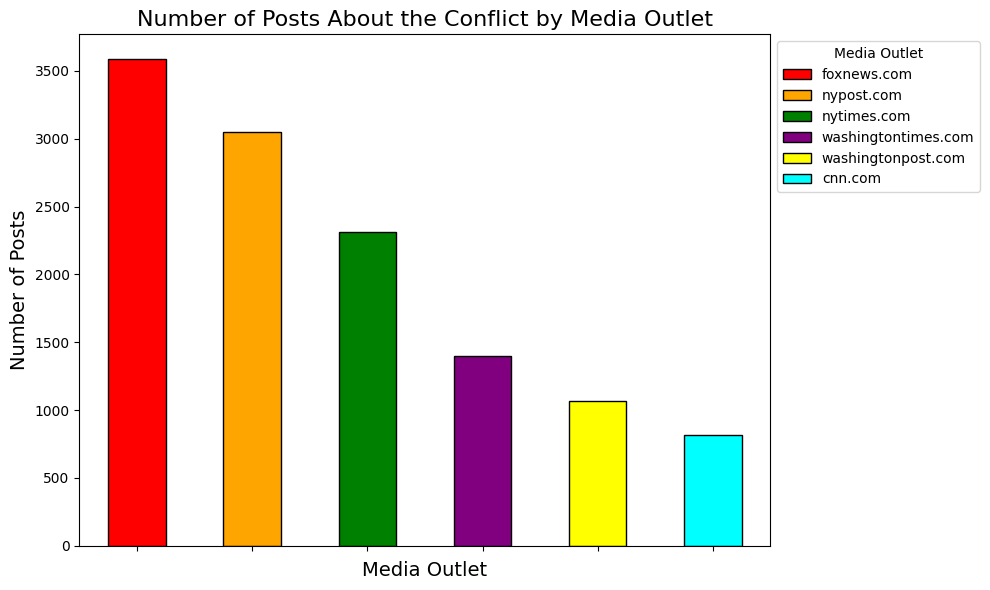

In [47]:
# Count the number of posts for each media outlet
media_counts = data_cleaned['Media Name'].value_counts()
print(media_counts)

# Define a specific color mapping for each media outlet
color_map = {
    'foxnews.com': 'red',
    'cnn.com': 'cyan',
    'nytimes.com': 'green',
    'washingtontimes.com': 'purple',
    'nypost.com': 'orange',
    'washingtonpost.com': 'yellow'
}

# Create a list of colors according to the color_map
colors = media_counts.index.map(color_map)

# Create the plot with specific colors
plt.figure(figsize=(10, 6))
bars = media_counts.plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Number of Posts About the Conflict by Media Outlet", fontsize=16)

# Remove the media names on the x-axis
plt.xticks(ticks=np.arange(len(media_counts)), labels=[""] * len(media_counts))

# Add the legend with media names
plt.legend(bars.patches, media_counts.index, title='Media Outlet', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [48]:

def clean_media_data(file_path):
    
    data = pd.read_csv(file_path)
    
    # Drop unnecessary columns
    data_cleaned = data.drop(columns=['id', 'indexed_date', 'media_url', 'url'])
    data_cleaned = data_cleaned[data_cleaned['language'] == 'en']
    data_cleaned = data_cleaned.rename(columns={
        "media_name": "Media Name",
        "publish_date": "Publish Date",
        "language": "Language",
        "title": "Title",
    })

    # Count the number of entries by media name
    media_counts = data_cleaned['Media Name'].value_counts()
    
    # Print the number of entries for each media outlet
    for media, count in media_counts.items():
        print(f"Number of entries for {media}: {count}")
    
    return data_cleaned

In [49]:
# Read in the news CSV file
fox_file_path = '../data/fox.csv'
fox_cleaned = clean_media_data(fox_file_path)

cnn_file_path = '../data/cnn.csv'
cnn_cleaned = clean_media_data(cnn_file_path)

nypost_file_path = '../data/nypost.csv'
nypost_cleaned = clean_media_data(nypost_file_path)

nytimes_file_path = '../data/nytimes.csv'
nytimes_cleaned = clean_media_data(nytimes_file_path)

washingtonpost_file_path = '../data/washingtonpost.csv'
washingtonpost_cleaned = clean_media_data(washingtonpost_file_path)

washingtontimes_file_path = '../data/washingtontimes.csv'
washingtontimes_cleaned = clean_media_data(washingtontimes_file_path)


Number of entries for foxnews.com: 52599
Number of entries for cnn.com: 9351
Number of entries for nypost.com: 71485
Number of entries for nytimes.com: 43011
Number of entries for washingtonpost.com: 16747
Number of entries for washingtontimes.com: 29683


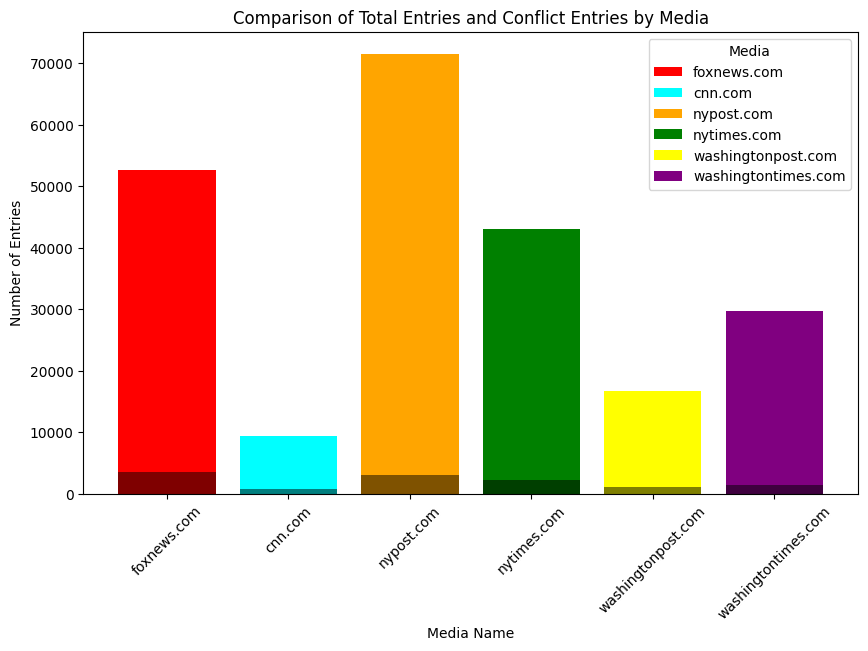

In [50]:
total_entries = {
    'foxnews.com': 52599,
    'cnn.com': 9351,
    'nypost.com': 71485,
    'nytimes.com': 43011,
    'washingtonpost.com': 16747,
    'washingtontimes.com': 29683
}

conflict_entries = {
    'foxnews.com': 3590,
    'nypost.com': 3048,
    'nytimes.com': 2312,
    'washingtontimes.com': 1398,
    'washingtonpost.com': 1066,
    'cnn.com': 815
}

# Color map
color_map = {
    'foxnews.com': 'red',
    'cnn.com': 'cyan',
    'nytimes.com': 'green',
    'washingtontimes.com': 'purple',
    'nypost.com': 'orange',
    'washingtonpost.com': 'yellow'
}

fig, ax = plt.subplots(figsize=(10, 6))
for media in total_entries:
    ax.bar(media, total_entries[media], color=color_map[media], label=media)

for media in conflict_entries:
    ax.bar(media, conflict_entries[media], color='black', alpha=0.5)

ax.set_xlabel('Media Name')
ax.set_ylabel('Number of Entries')
ax.set_title('Comparison of Total Entries and Conflict Entries by Media')
ax.legend(title='Media')
plt.xticks(rotation=45)
plt.show()


## 1 Sentiment Analysis and Keyword Frequency of Headlines

### 1.1 Sentiment Score with VADER

This plot shows the average sentiment score for each media outlet, with different colors representing each outlet. It provides an overview of the tone (positive, neutral, or negative) in the media's reporting on the Israel-Palestine conflict.


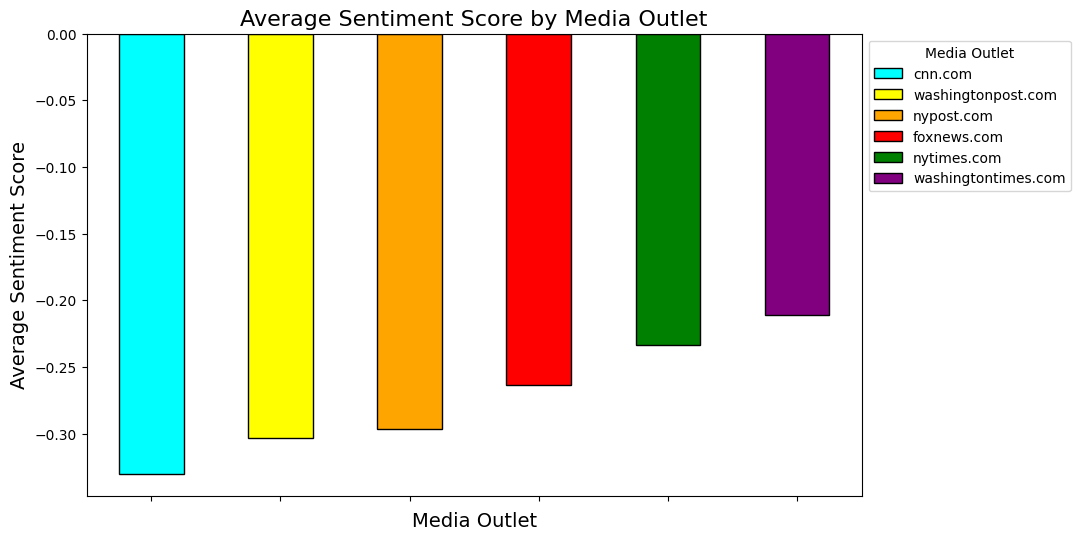

In [51]:
analyzer = SentimentIntensityAnalyzer()

data_cleaned['Sentiment Score'] = data_cleaned['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data_cleaned

avg_sentiment_by_outlet = data_cleaned.groupby('Media Name')['Sentiment Score'].mean().sort_values()

# Create a list of colors according to the color_map
colors = avg_sentiment_by_outlet.index.map(color_map)

# Plot the average sentiment by outlet with specific colors
plt.figure(figsize=(10, 6))
bars = avg_sentiment_by_outlet.plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Average Sentiment Score by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts)), labels=[""] * len(media_counts))
plt.legend(bars.patches, avg_sentiment_by_outlet.index, title='Media Outlet', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The following plot allows us to observe how the sentiment regarding the Israel-Palestine conflict has changed over time, providing insights into the tone of media coverage on a monthly basis.

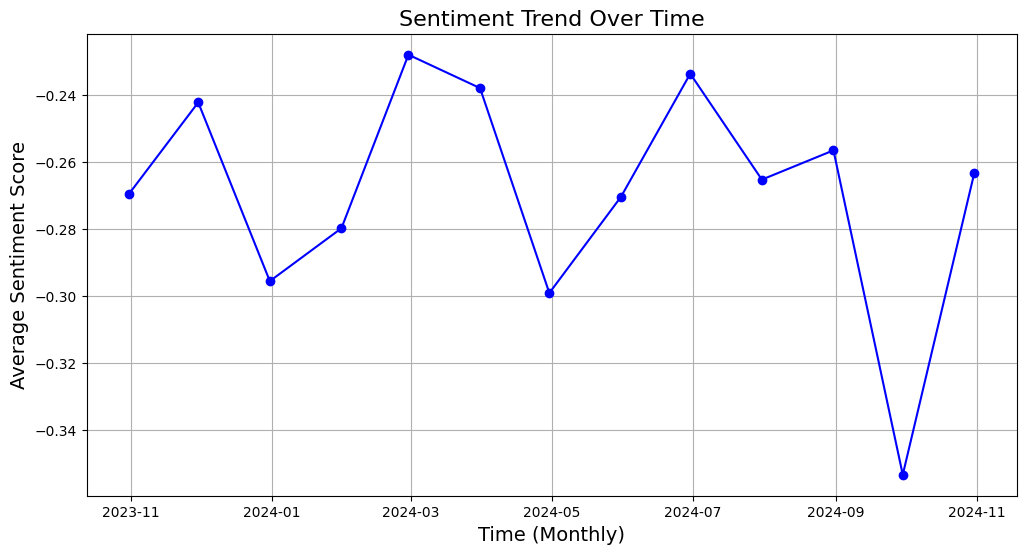

In [52]:
# Convert 'Publish Date' to datetime format
data_cleaned['Publish Date'] = pd.to_datetime(data_cleaned['Publish Date'])

# Calculate average sentiment score by month
sentiment_over_time = data_cleaned.resample('ME', on='Publish Date')['Sentiment Score'].mean()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o', color='blue')
plt.xlabel("Time (Monthly)", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Sentiment Trend Over Time", fontsize=16)
plt.grid()
plt.show()

The next plot helps visualize how each media outlet covers the Israel-Palestine conflict, categorizing headlines into positive, neutral, or negative sentiments. It provides a clear overview of the tone in which each media outlet reports on the conflict.

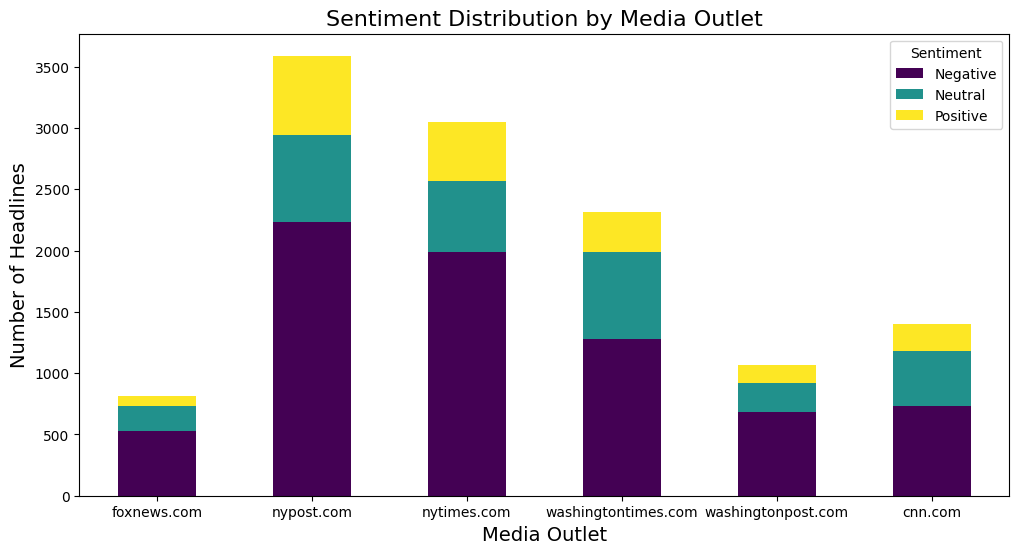

In [53]:
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

data_cleaned['Sentiment Label'] = data_cleaned['Sentiment Score'].apply(classify_sentiment)

#positive, neutral, and negative headlines by media outlet
sentiment_counts = data_cleaned.groupby(['Media Name', 'Sentiment Label']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Headlines", fontsize=14)
plt.title("Sentiment Distribution by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts)), labels=media_counts.index, rotation=0)
plt.legend(title="Sentiment")
plt.show()


### 1.3 Keyword Analysing

In [ ]:
# Here you can enter the code Cash & Binbin

## 2 Event Salience: Coverage vs. Casualties

### 2.1

## 3 Comparative Outlet Ideology

### 3.1